In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
import catboost as cb

In [1]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pycountry

# Load the datasets into pandas DataFrames
meta_data_API = pd.read_csv("meta_data_API.csv")
em_data = pd.read_csv("Public_EM-DAT Data.csv")

# Create a dictionary mapping country codes to country names
country_code_to_name = {country.alpha_3: country.name for country in pycountry.countries}

# Update country names and country codes in meta_data_API DataFrame
meta_data_API['Country Name'] = meta_data_API['Country Code'].map(country_code_to_name)
meta_data_API['Country Code'] = meta_data_API['Country Code'].apply(lambda x: x.upper())

# Update country names and country codes in em_data DataFrame
em_data['Country Name'] = em_data['Country Code'].map(country_code_to_name)
em_data['Country Code'] = em_data['Country Code'].apply(lambda x: x.upper())

# Drop 2024 in 'Year'column in the DataFrame em_data
em_data = em_data[em_data['Year'] != 2024]

# Display the first few rows of updated meta_data_API and em_data DataFrames
print("First few rows of updated meta_data_API:")
print(meta_data_API.head())

print("First few rows of updated em_data:")
print(em_data.head())

First few rows of updated meta_data_API:
  Country Name Country Code                             Indicator Name  \
0        Aruba          ABW  Personal remittances, received (% of GDP)   
1          NaN          AFE  Personal remittances, received (% of GDP)   
2  Afghanistan          AFG  Personal remittances, received (% of GDP)   
3          NaN          AFW  Personal remittances, received (% of GDP)   
4       Angola          AGO  Personal remittances, received (% of GDP)   

         Indicator Code      1970      1971      1972      1973      1974  \
0  BX.TRF.PWKR.DT.GD.ZS       NaN       NaN       NaN       NaN       NaN   
1  BX.TRF.PWKR.DT.GD.ZS  0.099291  0.089872  0.115434  0.079443  0.104931   
2  BX.TRF.PWKR.DT.GD.ZS       NaN       NaN       NaN       NaN       NaN   
3  BX.TRF.PWKR.DT.GD.ZS       NaN       NaN       NaN       NaN       NaN   
4  BX.TRF.PWKR.DT.GD.ZS       NaN       NaN       NaN       NaN       NaN   

       1975  ...      2014      2015      2016     

In [5]:
# Verify consistency across related columns
Total_Number_country_Rem = meta_data_API['Country Name'].unique()
num_unique_countries = len(Total_Number_country_Rem)
print("num_unique_countries:", num_unique_countries)


# Verify consistency across related columns
Total_Number_country_Dis= em_data['Country Name'].unique()
num_unique_countries = len(Total_Number_country_Dis)
print("num_unique_countries:", num_unique_countries)

num_unique_countries: 216
num_unique_countries: 219


In [6]:
# Calculate percentage of missing values in each column
missing_percentage = (meta_data_API.isna().sum() / len(em_data)) * 100

# Display missing percentage for each column
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Country Name      0.329011
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              1.645055
1971              1.625702
1972              1.612799
1973              1.612799
1974              1.535385
1975              1.380556
1976              1.290239
1977              1.103155
1978              1.077350
1979              1.012838
1980              0.987033
1981              0.961228
1982              0.896716
1983              0.851558
1984              0.864460
1985              0.858009
1986              0.825753
1987              0.825753
1988              0.851558
1989              0.812851
1990              0.793497
1991              0.741888
1992              0.709632
1993              0.658022
1994              0.606412
1995              0.535449
1996              0.503193
1997              0.516096
1998              0.477389
1999              0.477389
2000              0.464486
2001      

In [7]:
# Drop rows with NaN values in 'Country Name' column from meta_data_API DataFrame
meta_data_API = meta_data_API.dropna(subset=['Country Name'])

# Drop rows with NaN values in 'Country Name' column from em_data DataFrame
em_data = em_data.dropna(subset=['Country Name'])

# Display the first few rows of the updated meta_data_API and em_data DataFrames after dropping rows with NaN in 'Country Name'
print("First few rows of meta_data_API after dropping rows with NaN in 'Country Name':")
print(meta_data_API.head())

print("\nFirst few rows of em_data after dropping rows with NaN in 'Country Name':")
print(em_data.head())

First few rows of meta_data_API after dropping rows with NaN in 'Country Name':
  Country Name Country Code                             Indicator Name  \
0        Aruba          ABW  Personal remittances, received (% of GDP)   
2  Afghanistan          AFG  Personal remittances, received (% of GDP)   
4       Angola          AGO  Personal remittances, received (% of GDP)   
5      Albania          ALB  Personal remittances, received (% of GDP)   
6      Andorra          AND  Personal remittances, received (% of GDP)   

         Indicator Code  1970  1971  1972  1973  1974  1975  ...       2014  \
0  BX.TRF.PWKR.DT.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   2.100722   
2  BX.TRF.PWKR.DT.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.236114   
4  BX.TRF.PWKR.DT.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   0.022778   
5  BX.TRF.PWKR.DT.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  10.742301   
6  BX.TRF.PWKR.DT.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   0.000000   



In [8]:
# Load the datasets
meta_data_API = meta_data_API

# Drop unnecessary columns from meta_data_API
meta_data_API = meta_data_API.drop(columns=['Indicator Name', 'Indicator Code'])

# Fill missing values with zeros
meta_data_API.fillna(0, inplace=True)

# Display first few rows to verify
print("First few rows of meta_data_API after dropping columns:")
print(meta_data_API.head())

First few rows of meta_data_API after dropping columns:
  Country Name Country Code  1970  1971  1972  1973  1974  1975  1976  1977  \
0        Aruba          ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  Afghanistan          AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       Angola          AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5      Albania          ALB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6      Andorra          AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   ...       2014       2015       2016       2017      2018      2019  \
0  ...   2.100722   1.810387   1.765777   1.815417  1.126930  1.009012   
2  ...   1.236114   1.821996   3.464843   4.387093  4.450986  4.407428   
4  ...   0.022778   0.012282   0.007559   0.001925  0.001988  0.004860   
5  ...  10.742301  11.336438  11.010768  10.075653  9.621069  9.562582   
6  ...   0.000000   0.000000   0.000000   0.000000  0.000000  0.668748   

       2020      2021   

In [9]:
# List of columns to drop
columns_to_drop = ['Admin Units', 'Unnamed: 6', 'Unnamed: 10', 'Disaster Subgroup']

# Drop the columns from the em_data DataFrame
em_data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFrame after dropping columns
print("First few rows of em_data after dropping columns:")
print(em_data.head())

First few rows of em_data after dropping columns:
   Year Country Name Disaster Type Country Code  \
0  1970      Morocco         Flood          MAR   
1  1970         Peru         Flood          PER   
2  1970        Niger      Epidemic          NER   
3  1970  Philippines    Earthquake          PHL   
4  1970       Cyprus      Epidemic          CYP   

                         Subregion  Total Deaths  No. Injured  No. Affected  \
0                  Northern Africa          11.0          3.0      266441.0   
1  Latin America and the Caribbean           3.0         50.0      131000.0   
2               Sub-Saharan Africa         319.0          NaN        2677.0   
3               South-eastern Asia          14.0        200.0           NaN   
4                     Western Asia           NaN          NaN           NaN   

   Total Damage, Adjusted ('000 US$)  
0                           235442.0  
1                            40810.0  
2                                NaN  
3           

In [10]:
# Impute missing values with median for numeric columns
numeric_columns = ['Total Deaths', 'No. Injured', 'No. Affected', 'Total Damage, Adjusted (\'000 US$)']
em_data[numeric_columns] = em_data[numeric_columns].fillna(em_data[numeric_columns].median())

# Display the first few rows of the DataFrame after imputation
print("First few rows of em_data after imputation:")
print(em_data.head())

First few rows of em_data after imputation:
   Year Country Name Disaster Type Country Code  \
0  1970      Morocco         Flood          MAR   
1  1970         Peru         Flood          PER   
2  1970        Niger      Epidemic          NER   
3  1970  Philippines    Earthquake          PHL   
4  1970       Cyprus      Epidemic          CYP   

                         Subregion  Total Deaths  No. Injured  No. Affected  \
0                  Northern Africa          11.0          3.0      266441.0   
1  Latin America and the Caribbean           3.0         50.0      131000.0   
2               Sub-Saharan Africa         319.0         47.5        2677.0   
3               South-eastern Asia          14.0        200.0       10000.0   
4                     Western Asia          16.0         47.5       10000.0   

   Total Damage, Adjusted ('000 US$)  
0                           235442.0  
1                            40810.0  
2                           130797.0  
3                 

In [11]:
# Load the meta_data_API dataset
remittance_dataset = meta_data_API

# Select the columns from "1970" to "2023" and transpose them
transposed_data = meta_data_API.melt(id_vars=["Country Name", "Country Code"], 
                                     var_name="Year", 
                                     value_name="Remittance")

# Save the filtered datasets to new CSV files
transposed_data.to_csv('Word_remittance_data.csv', index=False)
# Display the transposed data
print(transposed_data)

       Country Name Country Code  Year  Remittance
0             Aruba          ABW  1970         0.0
1       Afghanistan          AFG  1970         0.0
2            Angola          AGO  1970         0.0
3           Albania          ALB  1970         0.0
4           Andorra          AND  1970         0.0
...             ...          ...   ...         ...
11605         Samoa          WSM  2023         0.0
11606         Yemen          YEM  2023         0.0
11607  South Africa          ZAF  2023         0.0
11608        Zambia          ZMB  2023         0.0
11609      Zimbabwe          ZWE  2023         0.0

[11610 rows x 4 columns]


In [12]:
# Verify consistency across related columns
Total_Number_country_Rem = meta_data_API['Country Name'].unique()
num_unique_countries = len(Total_Number_country_Rem)
print("num_unique_countries:", num_unique_countries)


# Verify consistency across related columns
Total_Number_country_Dis= em_data['Country Name'].unique()
num_unique_countries = len(Total_Number_country_Dis)
print("num_unique_countries:", num_unique_countries)

num_unique_countries: 215
num_unique_countries: 218


In [40]:
# Convert 'Year' column to string type in the em_data DataFrame
em_data['Year'] = em_data['Year'].astype(str)

# Merge the remittance_dataset (meta_data_API) with the em_data DataFrame using outer join on 'Country Name' and 'Year'
merged_data = pd.merge(transposed_data, em_data, on=['Year', 'Country Name', 'Country Code'], how='outer', suffixes=('_remittance', '_em'))

# Drop rows where 'Country Name' values do not match
merged_data.dropna(subset=['Country Name'], inplace=True)

# Display the merged DataFrame after dropping rows with non-matching Country Names
print("Merged DataFrame after dropping non-matching Country Names:")
print(merged_data)

Merged DataFrame after dropping non-matching Country Names:
         Country Name Country Code  Year  Remittance Disaster Type  \
0         Afghanistan          AFG  1970    0.000000           NaN   
1             Albania          ALB  1970    0.000000           NaN   
2             Algeria          DZA  1970    4.338415           NaN   
3      American Samoa          ASM  1970    0.000000           NaN   
4             Andorra          AND  1970    0.000000           NaN   
...               ...          ...   ...         ...           ...   
21893          Zambia          ZMB  2023    0.000000         Flood   
21894          Zambia          ZMB  2023    0.000000      Epidemic   
21895          Zambia          ZMB  2023    0.000000         Flood   
21896        Zimbabwe          ZWE  2023    0.000000         Storm   
21897        Zimbabwe          ZWE  2023    0.000000      Epidemic   

                Subregion  Total Deaths  No. Injured  No. Affected  \
0                     NaN    

In [63]:
# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_data_with_matching_country_names.csv', index=False)
print("Merged DataFrame saved to 'merged_data_with_matching_country_names.csv'")

Merged DataFrame saved to 'merged_data_with_matching_country_names.csv'


In [41]:
# Filter the merged DataFrame for the year 2021
merged_data_2021 = merged_data[merged_data['Year'] == '2021']

# Find the country with the highest remittance in 2021
country_highest_remitance_2021 = merged_data_2021.loc[merged_data_2021['Remittance'].idxmax()]

# Display the country with the highest remittance in 2021
print("Country with the highest remittance in 2021:")
print(country_highest_remitance_2021)

Country with the highest remittance in 2021:
Country Name                             Tonga
Country Code                               TON
Year                                      2021
Remittance                           46.949389
Disaster Type                              NaN
Subregion                                  NaN
Total Deaths                               NaN
No. Injured                                NaN
No. Affected                               NaN
Total Damage, Adjusted ('000 US$)          NaN
Name: 20795, dtype: object


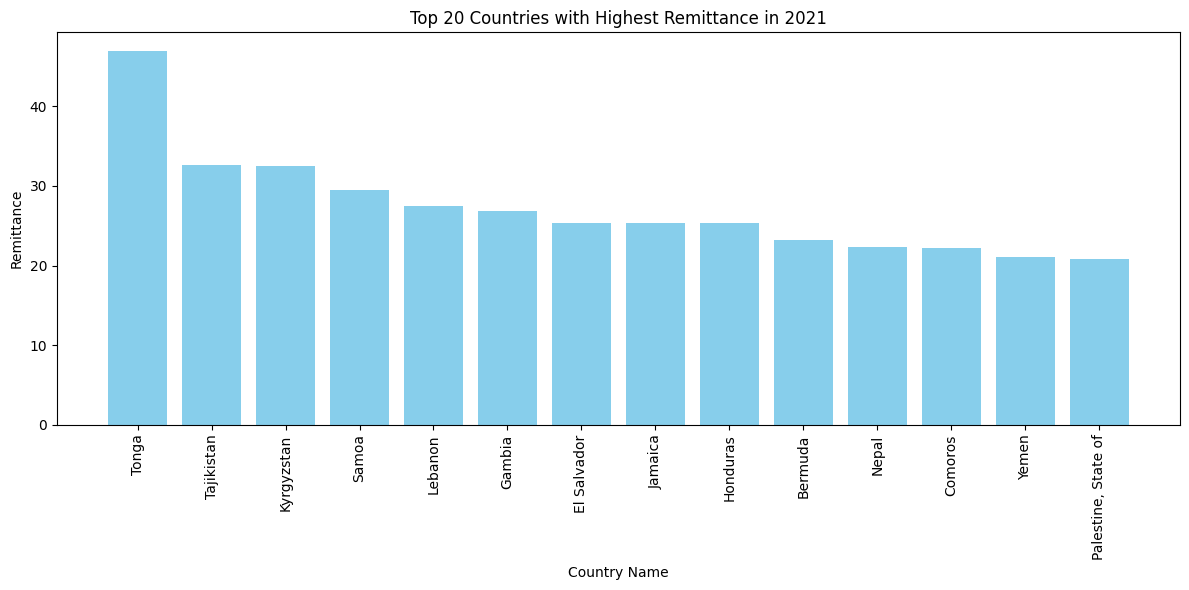

In [17]:
import matplotlib.pyplot as plt

# Filter the merged DataFrame for the year 2021
merged_data_2021 = merged_data[merged_data['Year'] == '2021']

# Sort the data by remittance values in descending order
merged_data_2021_sorted = merged_data_2021.sort_values(by='Remittance', ascending=False)

# Select the top 20 countries with the highest remittance values
top_20_countries = merged_data_2021_sorted.head(20)

# Create a bar plot to visualize the remittance of the top 20 countries in 2021
plt.figure(figsize=(12, 6))
plt.bar(top_20_countries['Country Name'], top_20_countries['Remittance'], color='skyblue')
plt.xlabel('Country Name')
plt.ylabel('Remittance')
plt.title('Top 20 Countries with Highest Remittance in 2021')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Display basic information about the merged dataset
print("Basic Information about the Merged Dataset:")
print(merged_data.info())

# Display the first few rows of the merged dataset
print("\nFirst Few Rows of the Merged Dataset:")
print(merged_data.head())

Basic Information about the Merged Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21898 entries, 0 to 21897
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       21898 non-null  object 
 1   Country Code                       21898 non-null  object 
 2   Year                               21898 non-null  object 
 3   Remittance                         21722 non-null  float64
 4   Disaster Type                      15370 non-null  object 
 5   Subregion                          15370 non-null  object 
 6   Total Deaths                       15370 non-null  float64
 7   No. Injured                        15370 non-null  float64
 8   No. Affected                       15370 non-null  float64
 9   Total Damage, Adjusted ('000 US$)  15370 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.7+ MB
None

First Few Rows of the

In [ ]:
# Create a new column 'Has_Disaster' indicating the presence of disaster (not missing)
merged_data['HaD_Disaster'] = merged_data['Disaster Type'].notna()

# Create a new column 'No_Disaster' indicating absence of disaster (missing)
merged_data['No_Disaster'] = merged_data['Disaster Type'].isna()

In [55]:
# Convert 'Year' to datetime format (adjust format string if needed)
merged_data['Year'] = pd.to_datetime(merged_data['Year'], format='%Y')

# Explore data types
print(merged_data.dtypes)

# Descriptive statistics for numerical columns
print(merged_data.describe())


Country Name                                 object
Country Code                                 object
Year                                 datetime64[ns]
Remittance                                  float64
Disaster Type                                object
Subregion                                    object
Total Deaths                                float64
No. Injured                                 float64
No. Affected                                float64
Total Damage, Adjusted ('000 US$)           float64
HaD_Disaster                                   bool
No_Disaster                                    bool
dtype: object
                                Year    Remittance   Total Deaths  \
count                          21898  21722.000000   15370.000000   
mean   2000-02-01 07:14:04.679879424      2.344909     254.164086   
min              1970-01-01 00:00:00      0.000000       0.000000   
25%              1989-01-01 00:00:00      0.000000       9.000000   
50%              

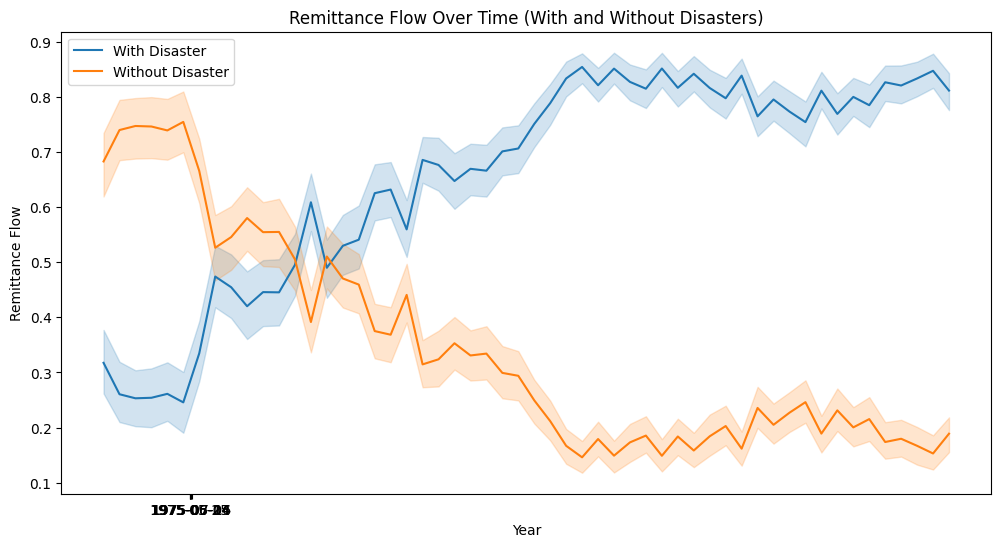

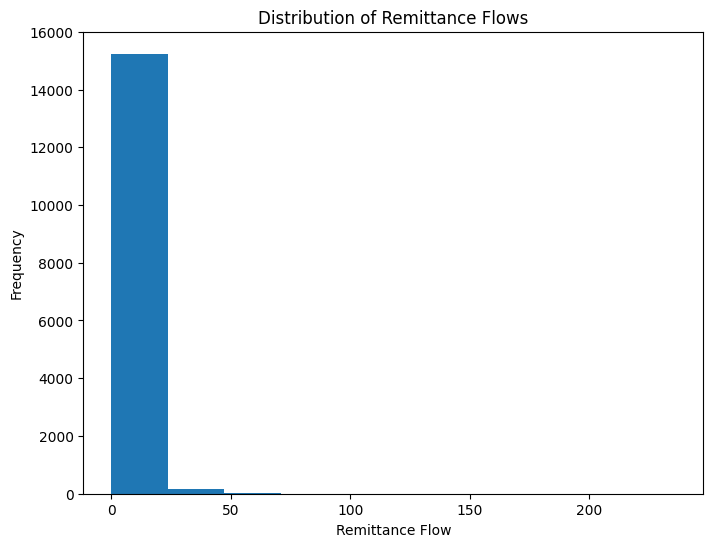

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data' is your DataFrame

# Filtering the data to exclude the year 2023
filtered_data = merged_data[merged_data['Year'] != 2023]

# Plotting the line plot for remittance flows over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='HaD_Disaster', label='With Disaster', data=filtered_data)
sns.lineplot(x='Year', y='No_Disaster', label='Without Disaster', data=filtered_data)

plt.xlabel('Year')
plt.ylabel('Remittance Flow')
plt.title('Remittance Flow Over Time (With and Without Disasters)')
plt.legend()

# Set x-ticks to include specific years and exclude 2023
years_to_include = [1970, 1980, 1990, 2000, 2010, 2022]
plt.xticks(years_to_include)

plt.show()

# Filtering the data to exclude the year 0
# Assuming your DataFrame is named 'merged_data'
filtered_data = merged_data[merged_data['Remittance'] != 0.000000]

# Plotting the distribution of remittance flows
plt.figure(figsize=(8, 6))
plt.hist(filtered_data['Remittance'])
plt.xlabel('Remittance Flow')
plt.ylabel('Frequency')
plt.title('Distribution of Remittance Flows')
plt.show()

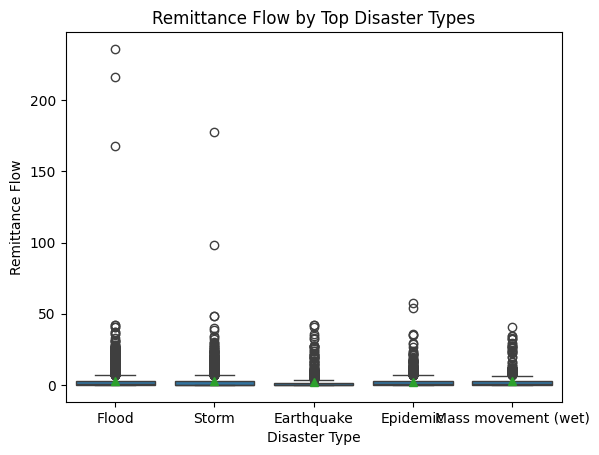

In [59]:
# Remittance vs Disaster Type (boxplots)
disaster_counts = merged_data['Disaster Type'].value_counts()
top_disasters = disaster_counts.nlargest(5).index  # Adjust the number of top disasters to display
sns.boxplot(x="Disaster Type", y="Remittance", showmeans=True, data=merged_data[merged_data['Disaster Type'].isin(top_disasters)])
plt.xlabel('Disaster Type')
plt.ylabel('Remittance Flow')
plt.title('Remittance Flow by Top Disaster Types')
plt.show()

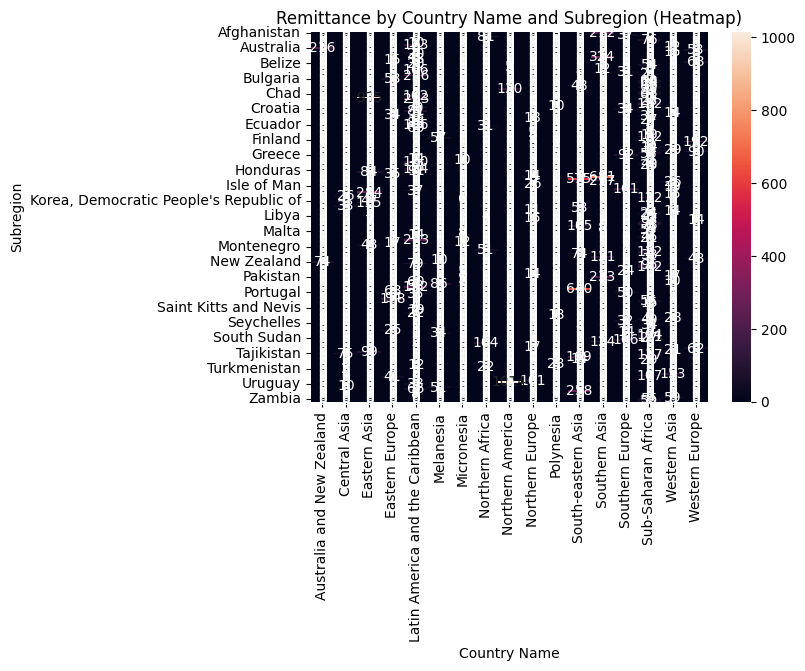

              Remittance  Total Deaths  No. Injured  No. Affected
Remittance      1.000000     -0.004536     0.007879     -0.011052
Total Deaths   -0.004536      1.000000     0.149808      0.033040
No. Injured     0.007879      0.149808     1.000000      0.076006
No. Affected   -0.011052      0.033040     0.076006      1.000000


In [60]:
# Heatmap (explore relationships between categorical variables)
contingency_table = pd.crosstab(merged_data['Country Name'], merged_data['Subregion'])
sns.heatmap(contingency_table, annot=True, fmt="d")
plt.xlabel('Country Name')
plt.ylabel('Subregion')
plt.title('Remittance by Country Name and Subregion (Heatmap)')
plt.show()

# Additional Analysis (focusing on frequent disaster countries)
disaster_counts = merged_data['Disaster Type'].value_counts()
disaster_threshold = 10
frequent_disaster_countries = merged_data[merged_data['Disaster Type'].isin(disaster_counts[disaster_counts >= disaster_threshold].index)]

# Correlation between Remittance and Disaster-related columns (for frequent disaster countries)
correlation = frequent_disaster_countries[['Remittance', 'Total Deaths', 'No. Injured', 'No. Affected']].corr()
print(correlation)

In [65]:
# Print the unique disaster types in the merged data
unique_disaster_types = merged_data['Disaster Type'].unique()
print("Unique disaster types in the merged data:")
for disaster_type in unique_disaster_types:
    print(disaster_type)

Unique disaster types in the merged data:
nan
Flood
Storm
Drought
Earthquake
Epidemic
Mass movement (wet)
Wildfire
Volcanic activity
Extreme temperature
Infestation
Mass movement (dry)
Impact
Animal incident
Glacial lake outburst flood


In [51]:

# Verify consistency across related columns
Total_Number_country_Dis= merged_data ['Country Name'].unique()
num_unique_countries = len(Total_Number_country_Dis)
print("num_unique_countries:", num_unique_countries)

num_unique_countries: 228
